In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
train = pd.read_csv('train.csv')

# Nettoyage des données
train.fillna({
    'Age': train['Age'].median(),
    'Embarked': train['Embarked'].mode()[0],
    'Fare': train['Fare'].median(),
}, inplace=True)

# Encodage
label_encoder = LabelEncoder()
train['Sex_encoded'] = label_encoder.fit_transform(train['Sex'])
train['Embarked_encoded'] = label_encoder.fit_transform(train['Embarked'])

# Nouvelles variables
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)

# Sélection des features
features = ['Pclass', 'Sex_encoded', 'Age', 'Fare', 'Embarked_encoded', 'FamilySize', 'IsAlone']
X = train[features]
y = train['Survived']

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [2]:
# Modèles
dt_model = DecisionTreeClassifier(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=3)

# Entraînement
dt_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

# Prédictions
y_pred_dt = dt_model.predict(X_test)
y_pred_svm = svm_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)


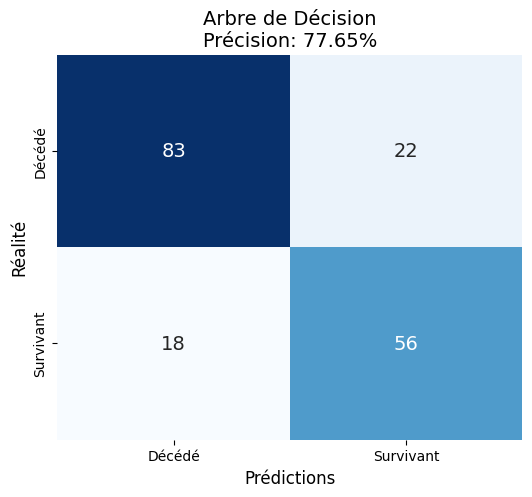


>>> Rapport pour Arbre de Décision :
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       105
           1       0.72      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



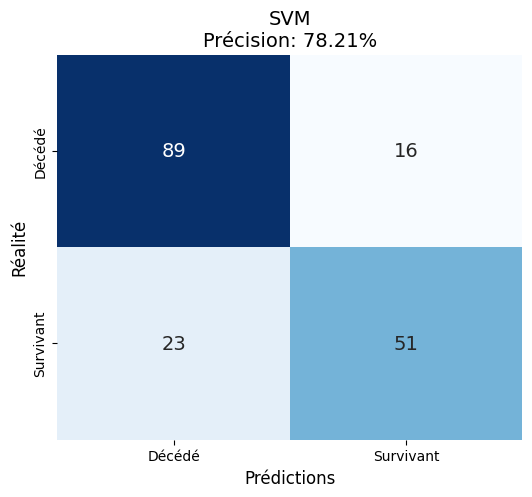


>>> Rapport pour SVM :
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       105
           1       0.76      0.69      0.72        74

    accuracy                           0.78       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



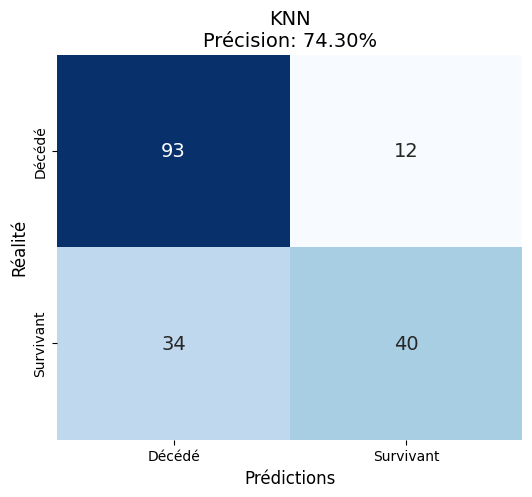


>>> Rapport pour KNN :
              precision    recall  f1-score   support

           0       0.73      0.89      0.80       105
           1       0.77      0.54      0.63        74

    accuracy                           0.74       179
   macro avg       0.75      0.71      0.72       179
weighted avg       0.75      0.74      0.73       179



In [3]:
# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Décédé', 'Survivant'],
                yticklabels=['Décédé', 'Survivant'],
                annot_kws={"size": 14})
    accuracy = accuracy_score(y_true, y_pred)
    plt.title(f'{model_name}\nPrécision: {accuracy:.2%}', fontsize=14)
    plt.xlabel('Prédictions', fontsize=12)
    plt.ylabel('Réalité', fontsize=12)
    plt.show()

# Visualisation et précision
for name, y_pred in [("Arbre de Décision", y_pred_dt), 
                     ("SVM", y_pred_svm), 
                     ("KNN", y_pred_knn)]:
    plot_confusion_matrix(y_test, y_pred, name)
    print(f"\n>>> Rapport pour {name} :")
    print(classification_report(y_test, y_pred))


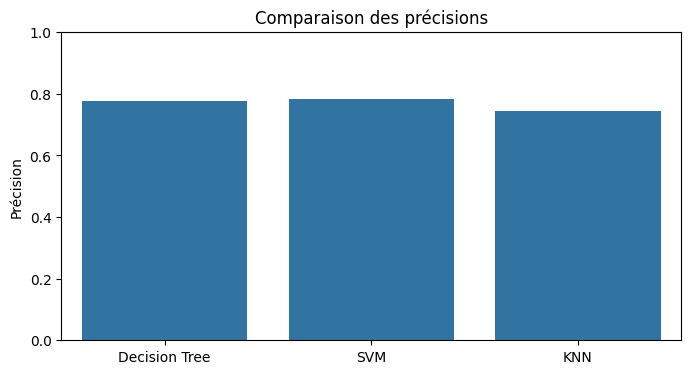

In [4]:
accuracies = {
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "KNN": accuracy_score(y_test, y_pred_knn),
}

plt.figure(figsize=(8, 4))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()))
plt.ylim(0, 1)
plt.title("Comparaison des précisions")
plt.ylabel("Précision")
plt.show()
